#TASK 1 WINE QUALITY PREDICTION

In [1]:
import numpy as np # linear algebra
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#Loading dataset
wine = pd.read_csv(r"C:\Users\tirum\Downloads\winequality-red.csv")


In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()
#Information about the data columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# plotting the data to know how the data columns are distributed in the dataset

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

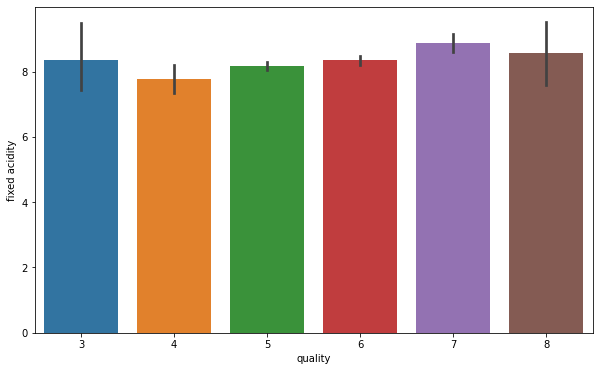

In [5]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

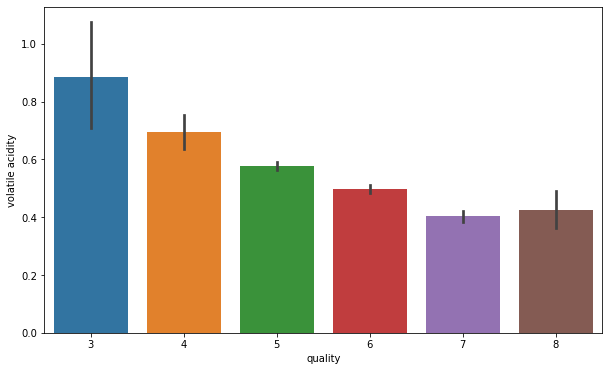

In [6]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

In [7]:
#Here we can see that its quite a downing trend in the volatile acidity as we go higher the quality from the above graph

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

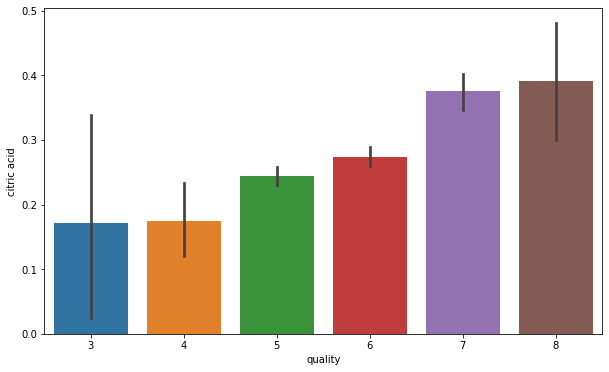

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)
#Composition of citric acid go higher as we go higher in the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

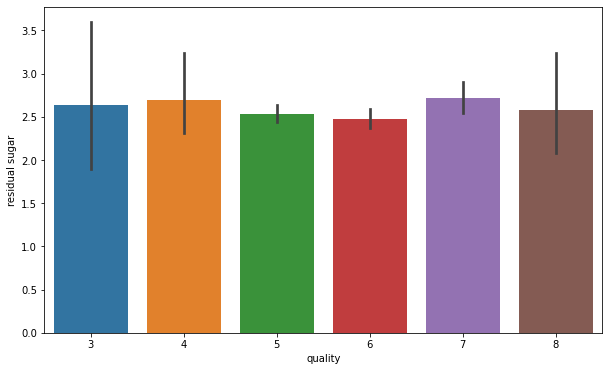

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

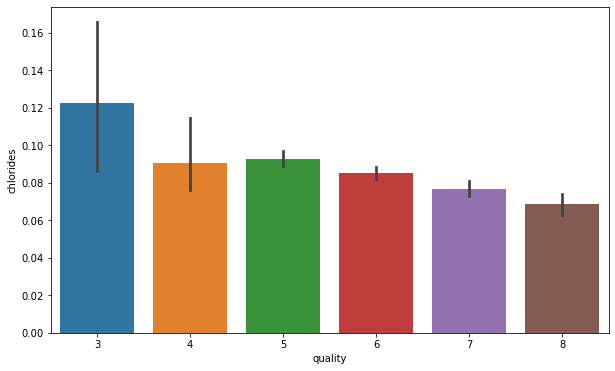

In [10]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

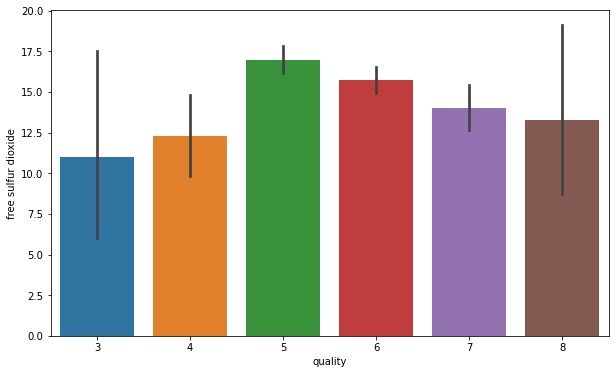

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

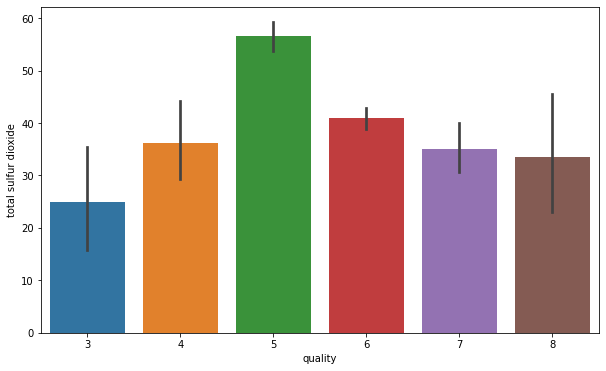

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

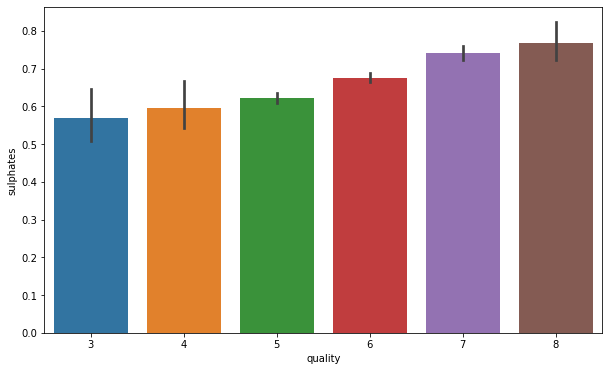

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

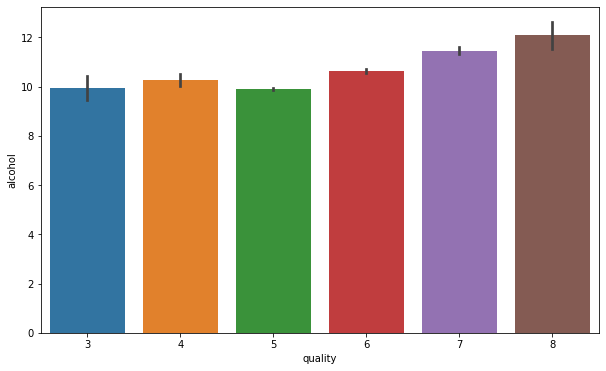

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [15]:
#Sulphates level goes higher with the quality of wine
#Alcohol level also goes higher as te quality of wine increases

# Preprocessing Data 


In [16]:
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [17]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [18]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\tirum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

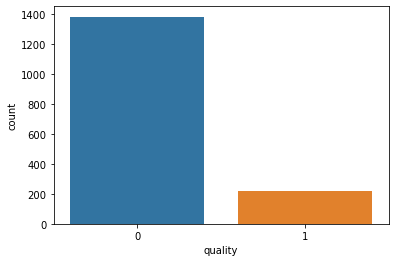

In [19]:
sns.countplot(wine['quality'])

In [20]:
#Now we will seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [21]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()


In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)


LinearRegression()

In [25]:
y_predict = regression_model.predict(X_test)
y_predict = np.round(y_predict)

sum = 0
for i,n in enumerate(y_test):
    if n == y_predict[i]:
        sum += 1
print(sum/len(y_test))

0.8625
